In [ ]:
General Description
Power generation is a complex process, and understanding and predicting power output is an important element in managing a plant and its connection to the power grid. The operators of a regional power grid create predictions of power demand based on historical information and environmental factors (e.g., temperature). They then compare the predictions against available resources (e.g., coal, natural gas, nuclear, solar, wind, hydro power plants). Power generation technologies such as solar and wind are highly dependent on environmental conditions, and all generation technologies are subject to planned and unplanned maintenance.

The power output of a peaker power plant varies depending on environmental conditions, so the business problem is predicting the power output of a peaker power plant as a function of the environmental conditions -- since this would enable the grid operator to make economic tradeoffs about the number of peaker plants to turn on (or whether to buy expensive power from another grid).


Data set Information

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.









Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.



In [ ]:
!pip install sklearn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score


In [75]:
df=pd.read_csv("C:\\Users\\pedro\\Desktop\\trai\\combined_cycle_power_plant.csv")

,temperature;exhaust_vacuum;ambient_pressure;relative_humidity;energy_output
0,9.59;38.56;1017.01;60.1;481.3
1,12.04;42.34;1019.72;94.67;465.36
2,13.87;45.08;1024.42;81.69;465.48
3,13.72;54.3;1017.89;79.08;467.05
4,15.14;49.64;1023.78;75;463.58
...,...
9563,17.1;49.69;1005.53;81.82;457.32
9564,24.73;65.34;1015.42;52.8;446.92
9565,30.44;56.24;1005.19;56.24;429.34
9566,23;66.05;1020.61;80.29;421.57


In [76]:
df.head(3)

,temperature;exhaust_vacuum;ambient_pressure;relative_humidity;energy_output
0,9.59;38.56;1017.01;60.1;481.3
1,12.04;42.34;1019.72;94.67;465.36
2,13.87;45.08;1024.42;81.69;465.48


In [77]:
temp=[]
exh=[]
ambie=[]
rela=[]
ene=[]
for i, row in df.iterrows():
    cur=row['temperature;exhaust_vacuum;ambient_pressure;relative_humidity;energy_output']
    a=cur.split(';')
    temp.append(float(a[0]))
    exh.append(float(a[1]))
    ambie.append(float(a[2]))
    rela.append(float(a[3]))
    ene.append(float(a[4]))
df = pd.DataFrame({'temperature': temp, 
                   'exhaust': exh,
                   'ambient': ambie,
                   'ambient': ambie,
                   'relative': rela,
                   'energy': ene,
                  })
df.head(3)

,temperature,exhaust,ambient,relative,energy
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48


In [84]:
df=df.drop_duplicates()

In [85]:
df.corr()

,temperature,exhaust,ambient,relative,energy
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust,0.843689,1.000000,-0.415718,-0.312214,-0.869900
ambient,-0.508222,-0.415718,1.000000,0.101631,0.518687
relative,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy,-0.947908,-0.869900,0.518687,0.391175,1.000000


In [16]:
'''
based off these results we can see that the greatest contributor to a positive energy result are:
1. Temoperature in this case a low temperature is the greatest single influence on energy results
2. A lower exhaust is the next greatest factor in a low energy result
3. A higher ambient pressure has a less pronounced but still decent effect on the energy output
4. A lower relative humidity has the least effect on energy output

'''

R2 score is -3412.5042322134946
0.8989475964148245


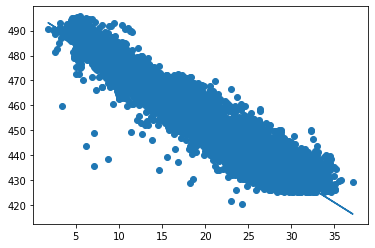

In [65]:
#energy vs temperature
x = df['temperature'].to_numpy()
y = df['energy'].to_numpy()
colors = np.random.rand(N)
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
r2 = r2_score(x, y)
print('R2 score is', r2)
temp=[]
for i in x:
    temp.append(a*i+b)
temp=np.array(temp)
corr_matrix = np.corrcoef(y, temp)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R2 score is:"+str(R_sq))

In [ ]:
#as we can observe there is a general downward trend between higher temps and energy output

0.7565177870683977


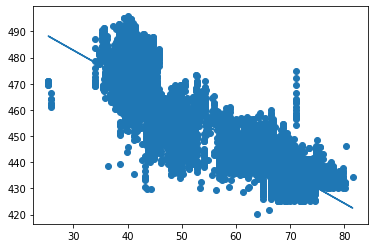

In [67]:
#energy vs exhaust
x = df['exhaust'].to_numpy()
y = df['energy'].to_numpy()
colors = np.random.rand(N)
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
temp=[]
for i in x:
    temp.append(a*i+b)
temp=np.array(temp)
corr_matrix = np.corrcoef(y, temp)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R2 score is:"+str(R_sq))

In [ ]:
#as we can observe there is a general downward trend between higher exhaust and energy output
#However, the nature of this correlation is more chaotic than that of temperature thus it may be more of a coorelation effect
#Thus we need to check temperature vs exhaust

R2 score is:0.7125161747846519
             temperature   exhaust   ambient  relative    energy
temperature     1.000000  0.844107 -0.507549 -0.542535 -0.948128
exhaust         0.844107  1.000000 -0.413502 -0.312187 -0.869780
ambient        -0.507549 -0.413502  1.000000  0.099574  0.518429
relative       -0.542535 -0.312187  0.099574  1.000000  0.389794
energy         -0.948128 -0.869780  0.518429  0.389794  1.000000


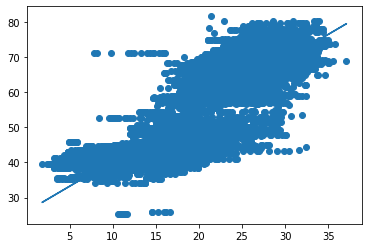

In [68]:
#temperature vs exhaust
x = df['temperature'].to_numpy()
y = df['exhaust'].to_numpy()
colors = np.random.rand(N)
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
temp=[]
for i in x:
    temp.append(a*i+b)
temp=np.array(temp)
corr_matrix = np.corrcoef(y, temp)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R2 score is:"+str(R_sq))

In [ ]:
#The coorelation between energy and exahust is strong enough that it is likely that as long as we decrease one of them 
#the other should go down with it so that we just need to focus on one, in this case temperature is more correlated 
#so we should aim for it

R2 score is:0.26876865641106756


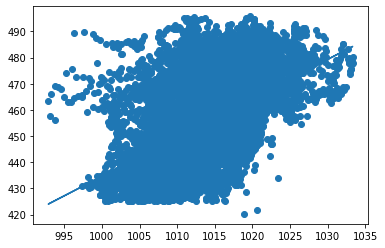

In [69]:
#energy vs ambient
x = df['ambient'].to_numpy()
y = df['energy'].to_numpy()
colors = np.random.rand(N)
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
temp=[]
for i in x:
    temp.append(a*i+b)
temp=np.array(temp)
corr_matrix = np.corrcoef(y, temp)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R2 score is:"+str(R_sq))

In [ ]:
#While there is an obserable correlation between ambient pressure and energy it appears very scattered
#and thus conculsions are harder to come to,

R2 score is:0.15193944023117587


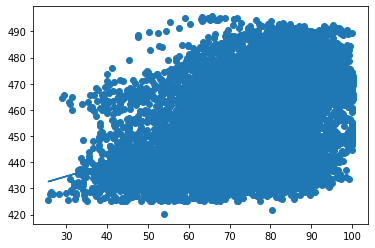

In [78]:
#energy vs humidity
x = df['relative'].to_numpy()
y = df['energy'].to_numpy()
colors = np.random.rand(N)
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
temp=[]
for i in x:
    temp.append(a*i+b)
temp=np.array(temp)
corr_matrix = np.corrcoef(y, temp)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R2 score is:"+str(R_sq))

In [97]:
x = np.quantile(df['energy'], 0.75)
print(x)
top=df[df['energy']>468.365]
print(top.head())
x = np.quantile(df['energy'], 0.25)
print(x)
bot=df[df['energy']<439.75]
print(bot.head())

468.365
    temperature  exhaust  ambient  relative  energy
0          9.59    38.56  1017.01     60.10  481.30
10         9.02    38.08  1019.02     69.98  478.32
26        12.51    43.67  1013.24     91.55  471.96
31         7.55    42.85  1011.21     93.25  484.93
32         5.62    41.38  1020.91     86.21  490.83
439.75
    temperature  exhaust  ambient  relative  energy
8         29.88    68.08  1011.14     55.78  429.33
9         23.22    66.56  1002.47     85.39  437.11
11        26.12    75.60  1017.41     72.31  439.68
13        29.56    52.84  1006.09     42.17  436.46
14        30.00    61.50  1009.40     48.63  435.60


In [99]:
top.describe()

,temperature,exhaust,ambient,relative,energy
count,2382.000000,2382.000000,2382.000000,2382.000000,2382.000000
mean,10.089500,40.730856,1017.079836,81.043115,477.668249
std,2.891188,2.835409,6.095768,10.953099,6.223098
min,1.810000,25.360000,993.740000,39.410000,468.370000
25%,7.982500,39.400000,1013.120000,74.060000,472.450000
50%,10.150000,40.710000,1017.230000,82.830000,477.015000
75%,12.217500,41.820000,1020.982500,89.012500,482.082500
max,21.190000,71.140000,1033.300000,100.160000,495.760000


In [100]:
bot.describe()

,temperature,exhaust,ambient,relative,energy
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,28.094227,69.066920,1008.916450,66.041962,434.154529
std,2.982606,5.985208,3.923648,14.864283,3.669866
min,7.140000,36.300000,997.340000,25.560000,420.260000
25%,25.970000,67.250000,1006.407500,55.070000,431.517500
50%,28.150000,69.980000,1008.910000,66.055000,434.600000
75%,30.292500,72.580000,1011.340000,77.330000,437.260000
max,37.110000,81.560000,1023.430000,99.270000,439.740000


In [104]:
((top.describe()-bot.describe())/((top.describe()+bot.describe())/2))*100

,temperature,exhaust,ambient,relative,energy
count,0.083998,0.083998,0.083998,0.083998,0.083998
mean,-94.305757,-51.615005,0.805864,20.397926,9.544337
std,-3.112732,-71.419031,43.358207,-30.298844,51.617120
min,-119.106145,-35.484917,-0.361613,42.635062,10.827904
25%,-105.956851,-52.226910,0.664759,29.412220,9.056188
50%,-93.994778,-52.886440,0.821266,22.534171,9.305463
75%,-85.038814,-53.776224,0.948914,14.046320,9.750991
max,-54.614065,-13.647675,0.959776,0.892544,11.976483
